<a href="https://colab.research.google.com/github/Sagnik220/FlowerClassification-GRADIO/blob/main/FlowerClassification_Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q gradio

     |████████████████████████████████| 1.1MB 19.8MB/s 
     |████████████████████████████████| 215kB 32.6MB/s 
     |████████████████████████████████| 1.9MB 44.2MB/s 
     |████████████████████████████████| 962kB 36.0MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 3.2MB 45.4MB/s 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


/root/.keras/datasets/flower_photos/roses/19823402005_2db025dd66_m.jpg


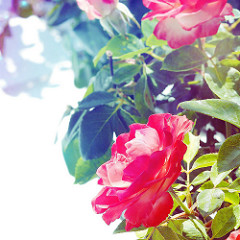

In [4]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [7]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [11]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
92/92 [==============================] - 94s 1s/step - loss: 1.7473 - accuracy: 0.2833 - val_loss: 1.1741 - val_accuracy: 0.5218
Epoch 2/30
92/92 [==============================] - 93s 1s/step - loss: 1.1012 - accuracy: 0.5674 - val_loss: 0.9942 - val_accuracy: 0.6090
Epoch 3/30
92/92 [==============================] - 93s 1s/step - loss: 0.9135 - accuracy: 0.6486 - val_loss: 0.9799 - val_accuracy: 0.6158
Epoch 4/30
92/92 [==============================] - 93s 1s/step - loss: 0.7237 - accuracy: 0.7448 - val_loss: 1.0184 - val_accuracy: 0.6281
Epoch 5/30
92/92 [==============================] - 93s 1s/step - loss: 0.5288 - accuracy: 0.8117 - val_loss: 1.1176 - val_accuracy: 0.6553
Epoch 6/30
92/92 [==============================] - 93s 1s/step - loss: 0.3383 - accuracy: 0.8818 - val_loss: 1.2998 - val_accuracy: 0.6403
Epoch 7/30
92/92 [==============================] - 93s 1s/step - loss: 0.2392 - accuracy: 0.9192 - val_loss: 1.3499 - val_accuracy: 0.6349
Epoch 8/30
92/92 [==

In [14]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [15]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='False')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://34128.gradio.app
Interface loading below...
